<a href="https://colab.research.google.com/github/cyan974/Hello-world/blob/master/HousePrices_YannV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20_HES-SO-ARC_646-2.3 SCIENCE DES DONNÉES
## House Prices: Advanced Regression Techniques
##### Audrey Voltz, Dimitri Chopart, Nathan Cortat, Yann Hackel

# 1 Compréhension métier  <a class="anchor" id="Businessunderstanding"></a>  
Dans ce notebook, nous allons prédire le prix d’une maison en fonction de plusieurs variables. Les informations utilisées sont présentes dans le jeu de données House price predictions de Kaggle. Plus précisement, il s'agit de la ville d'Ames dans l'Iowa. Ames est une ville universitaire de 67 000 habitants dont la moitiée d'étudiants.
Par sa position géographique, Ames est soumis aux tornades d'où l'importance des caves dans les résidences.



## 1.1 Déterminer les objectifs métiers <a class="anchor" id="BusinessObjectives"></a>  

Estimer le prix des biens immobiliers à partir de modèles avec des erreurs relatives (et non absolues). En effet notre variable dépendante (SalePrice) ne suit pas la loi normale, il faut donc passer par son logarithme. Le passage en logarithme va nous permettre de considérer les erreurs comme "absolues" du fait de la transormation logarithmique. Ceci permet alors l'utilisation des algorithmes de régression.



## 1.2 Évaluation de la situation actuelle<a class="anchor" id="Assessthecurrentsituation"></a>  


## Il est à prendre en compte l'importance de la phase préparatoire de nettoyage des données

### 1.2.1 Inventaire des resources <a class="anchor" id="Inventory"></a>
Liste de ressources disponibles pour le projet :
**Équipe**:
*   Dimitri Chopard
*   Nathan Cortat
*   Yann Hackel
*   Audrey Claire Voltz



**Données**:
* Le jeu de données qui sera splité en jeux d'entrainements et d'évaluation
* Les notesbook d'autres analystes
Ressources informatiques:
*	Un ordinateur
*	Un accès à Internet

**Software**:
*	Microsoft Teams
*	Google Colaboratory
*	Jupyter Notebook


In [ ]:
# Import Libraries Required
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
import seaborn as sns
import scipy.stats as stats
import xgboost as xgb
import datetime
import time

from statsmodels.graphics.gofplots import ProbPlot

from scipy.stats import chi2

from sklearn import datasets 
from sklearn.svm import SVC
from sklearn import svm
#from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split #deprecated from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ## 1.3 Quels sont les résultats souhaités du projet ? <a class="anchor" id="Résultats souhaités"></a>  
 **Critères de réussite métier**
-  avoir un modèle prédictif efficace et compréhensible dans son fonctionnement


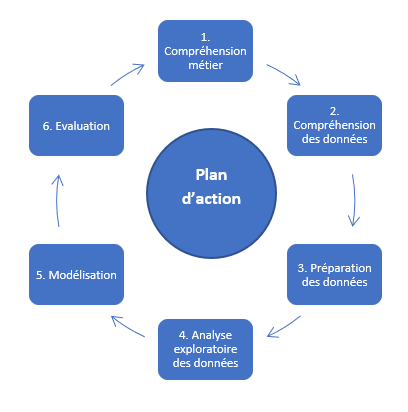


**Évaluation final**

Évaluation finale se fait via une soumission *Kaggle* pour chaque modèle. 

Kaggle Metric

Les soumissions sont évaluées sur la base de l'erreur quadratique moyenne (RMSE) entre le logarithme de la valeur prédite et le logarithme du prix de vente observé. (Le fait de prendre les logarithmes signifie que les erreurs de prédiction des maisons chères et des maisons bon marché affecteront le résultat de la même manière).


# 2 Compréhension des données <a class="anchor" id="Compréhension des données"></a>


## 2.1 Rapport de données initial <a class="anchor" id="Datareport"></a>



 ### 2.1.1 train.csv

Il s'agit du dataset d'entrainement

In [ ]:
path =  '/content/drive/MyDrive/ColabNotebooks/DataScience/HousePrices/train.csv'
train_raw = pd.read_csv(path, index_col = 'Id')

 ### 2.1.2 test.csv

Il s'agit du dataset de validation

In [ ]:
pathVal =  '/content/drive/MyDrive/ColabNotebooks/DataScience/HousePrices/test.csv'
validation_raw = pd.read_csv(pathVal, index_col = 'Id')

## 2.2 Description des données <a class="anchor" id="Describedata"></a>


In [ ]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
validation_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

On constate que le dataset d'entrainement contient 1460 instances de ventes et 80 attributs, alors que celui de validation contient 1459 instances de ventes et 79 attributs.  
La différence du nombre d'attributs réside dans le fait que le dataset d'entrainement contient l'attribut 'SalePrice', qui est la variable dépendante.  

### 2.2.1 Variable dépendante

In [ ]:
dependante = ['SalePrice']

Vérifions si la distribution de la variable dépendante est normale ou non

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


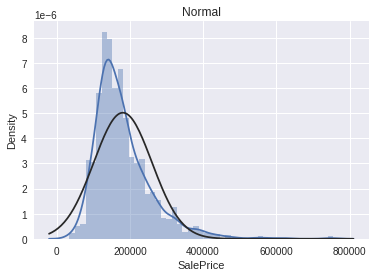

In [ ]:
# distribution plot with normal fit
y = train_raw['SalePrice']
plt.title('Normal')
sns.distplot(y, fit = stats.norm)
plt.show()

In [ ]:
# Shapiro-Wilk Test for normality
alpha = 0.05
W, p = stats.shapiro(y)

print('La p-valeur associée est de : ' + str(p))

if p < alpha : 
    print('Avec un seuil α = ' + str(alpha) + ', on rejète l\'hypothèse null')
else : 
    print('Avec un seuil α = ' + str(alpha) + ', on ne rejète pas l\'hypothèse null')

La p-valeur associée est de : 3.206247534576162e-33
Avec un seuil α = 0.05, on rejète l'hypothèse null


Distribution non normale, il faut passer par le logarithme

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


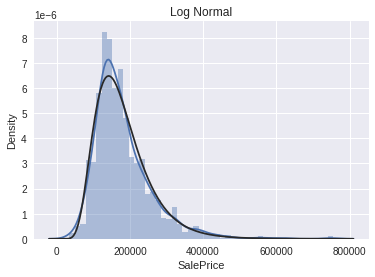

In [ ]:
# distribution plot with log normal fit
plt.title('Log Normal')
sns.distplot(y, fit=stats.lognorm)
plt.show()

La variable suit la distribution logarithmique

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


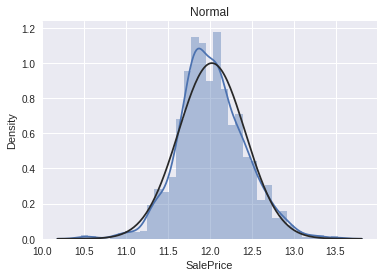

In [ ]:
# distribution plot with normal fit
y = np.log1p(y)
plt.title('Normal')
sns.distplot(y, fit = stats.norm)
plt.show()

On retrouve maintenant quasiment la distribution de la loi normale.

Les deux datasets ont donc 79 attributs en commun. Il s'agit des variables indépendantes.

### 2.2.2 Variables indépendantes

Parmi les 79 variables indépendantes, nous avons 36 variables numériques décomposées comme suit:  
* 5 variables numériques qui sont en fait du type date 

In [ ]:
time = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']

* 31 variables numériques, dont 11 variables quantitatives discrètes et 1 variable numérique (MSSubClass) dont les valeurs sont des nombres qui représentent des classes. Il s'agit donc d'une variable qualitative ordinal.

In [ ]:
quantitative = [f for f in train_raw.columns if train_raw.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('MSSubClass')
quantitative.remove('YearBuilt')
quantitative.remove('YearRemodAdd')
quantitative.remove('MoSold')
quantitative.remove('YrSold')
quantitative.remove('GarageYrBlt')
train_raw[quantitative].shape

(1460, 30)

Et enfin nous avons 43 variables catégoriques, dont 23 variables qualitatives nominales et 20 variables qualitatives ordinales, auxquelles on rajoute MSSubClass

In [ ]:
train_raw.MSSubClass = train_raw.MSSubClass.astype(object)
validation_raw.MSSubClass = validation_raw.MSSubClass.astype(object)

In [ ]:
qualitative = [f for f in train_raw.columns if train_raw.dtypes[f] == 'object']
train_raw[qualitative].shape

(1460, 44)

## 2.3 Vérification de la qualité des données <a class="anchor" id="Verifydataquality"></a>



Pour réaliser cette étape, nous auront besoin de faire les opérations sur les 2 datasets. 

In [ ]:
data_raw = pd.concat([train_raw, validation_raw])
data_raw.shape

(2919, 80)

### 2.3.1 Données manquantes <a class="anchor" id="Données manquantes"></a>


In [ ]:
# Affiche infos sur données manquante dans un tableau et en graph
def missing_values(data):
        mis_val = data.isnull().sum()
        mis_val = mis_val[mis_val>0]
        mis_val.sort_values(inplace=True)
        if mis_val.empty:
          print('Aucune donnée manquante')
        else:
          mis_val.plot.bar()
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

#### 2.3.1.1 Variables dates

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
GarageYrBlt,159.0,5.4


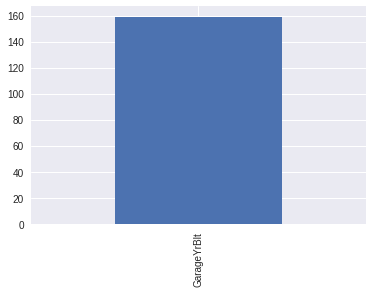

In [ ]:
missing_values(data_raw[time])

In [ ]:
exemple = ['GarageType', 'GarageYrBlt']
df = data_raw[data_raw['GarageYrBlt'].isnull()]
df[exemple].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 40 to 2918
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageType   2 non-null      object 
 1   GarageYrBlt  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 3.7+ KB


In [ ]:
df[exemple].head(159)

,GarageType,GarageYrBlt
Id,,
40,NaN,NaN
49,NaN,NaN
79,NaN,NaN
89,NaN,NaN
90,NaN,NaN
...,...,...
2894,NaN,NaN
2910,NaN,NaN
2914,NaN,NaN


On constate que les valeur NaN pour l'année de construction du garage correspond aux biens qui n'ont pas de garage.
Par conséquent nous allons remplacer les valeurs null par l'année actuelle, au moyen de la fonction suivante:

In [ ]:
def fill_missing_with_date(data, column, myDate):

  data_clean = data.copy()

  data_clean[column] = data_clean[column].replace(np.nan, myDate)

  return data_clean

In [ ]:
def compute_differences_to_year_sold(data) :
    
    data_clean = data.copy()
    data_clean['BuiltAge'] = data_clean['YrSold'] - data_clean['YearBuilt']
    data_clean['YearRemodAdd'] = data_clean['YrSold'] - data_clean['YearRemodAdd']
    data_clean['GarageAge'] = data_clean['YrSold'] - data_clean['GarageYrBlt']
    
    return data_clean

#### 2.3.1.2 Variables quantitatives

Your selected dataframe has 30 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,486.0,16.6
MasVnrArea,23.0,0.8
BsmtFullBath,2.0,0.1
BsmtHalfBath,2.0,0.1
BsmtFinSF1,1.0,0.0
BsmtFinSF2,1.0,0.0
BsmtUnfSF,1.0,0.0
TotalBsmtSF,1.0,0.0
GarageCars,1.0,0.0
GarageArea,1.0,0.0


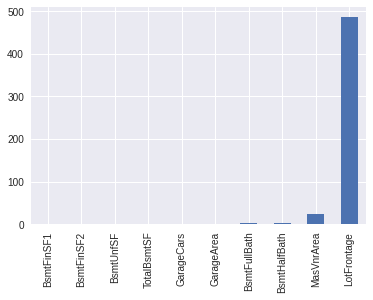

In [ ]:
missing_values(data_raw[quantitative])

On remplacera les valeurs null par 0 au moyen de la fonction suivante:

In [ ]:
def fill_missing_with_zero(data, columns):
    
    data_clean = data.copy()
    
    for c in columns :
        
        if data_clean[c].isnull().any():
            data_clean[c] = data_clean[c].fillna(0)   
    
    return data_clean

#### 2.3.1.3 Variables qualitatives

Your selected dataframe has 44 columns.
There are 23 columns that have missing values.


,Missing Values,% of Total Values
PoolQC,2909.0,99.7
MiscFeature,2814.0,96.4
Alley,2721.0,93.2
Fence,2348.0,80.4
FireplaceQu,1420.0,48.6
GarageCond,159.0,5.4
GarageQual,159.0,5.4
GarageFinish,159.0,5.4
GarageType,157.0,5.4
BsmtCond,82.0,2.8


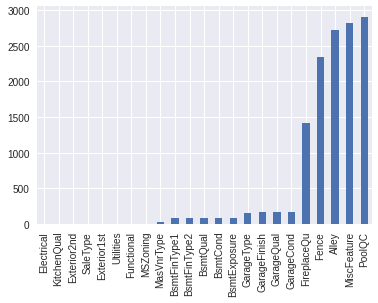

In [ ]:
missing_values(data_raw[qualitative])

In [ ]:
ExempleMissVal = ['PoolQC', 'MiscFeature', 'Alley']
data_raw[ExempleMissVal].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PoolQC       10 non-null     object
 1   MiscFeature  105 non-null    object
 2   Alley        198 non-null    object
dtypes: object(3)
memory usage: 91.2+ KB


In [ ]:
data_raw[ExempleMissVal].head(2919)

,PoolQC,MiscFeature,Alley
Id,,,
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
2915,NaN,NaN,NaN
2916,NaN,NaN,NaN
2917,NaN,NaN,NaN


On peut constater qu'un certain nombre de variables catégorielles ont dans le dataset une valeur "NA", non pas pour exprimer une absence de valeur, mais pour exprimer une absence de l'attribut en question.  
Or dans l'importation, on constate que la valeur a été mise à "NaN" ce qui fait qu'ils sont compter en tant que valeur manquante.  
D'où la nécessité de les retransformer en "NA" au moyen de la fonction suivante:

In [ ]:
def fill_missing_with_na(data, columns):
    
    data_clean = data.copy()
    
    for c in columns :
        
        if data_clean[c].isnull().any():
            data_clean[c] = data_clean[c].fillna('NA')   
    
    return data_clean

### 2.3.2 Normalisation

Objectif : utiliser des algorithmes nécessitant une comparaison des colonnes les unes aux autres.

In [ ]:


def normalize_all_columns(data) :
    
    data_clean = data.to_numpy(copy = True)
    
    data_clean = StandardScaler().fit_transform(data_clean)
    data_clean = pd.DataFrame(data_clean, index = data.index, columns = data.columns)
    
    return data_clean

In [ ]:

# https://www.kaggle.com/dgawlik/house-prices-eda
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o

    #features = quantitative + qual_encoded

### 2.3.3 Valeurs aberrantes <a class="anchor" id="Outliers"></a>
À ce stade, nous pourrions également vouloir supprimer les valeurs aberrantes. Celles-ci peuvent être dues à des fautes de frappe dans la saisie des données, à des erreurs dans les unités, ou elles peuvent être des valeurs légitimes mais extrêmes. Pour ce projet, nous supprimerons les anomalies en nous basant sur la définition des valeurs aberrantes extrêmes :

https://en.wikipedia.org/wiki/Outlier

- En dessous du premier quartile - 3 ∗ interquartile
- Au-dessus du troisième quartile + 3 ∗ interquartile

Afin de supprimer les outliers, nous allons utiliser la fonction suivante:

In [ ]:
def drop_outliers(data, y, features) :
    
    data_clean = data.copy()
    data_clean[y.name] = y
    
    for f in features :
        condition = (data_clean[f] < -3) | (data_clean[f] > 3)
        ix = data_clean[condition].index
        data_clean = data_clean.drop(index = ix)

    return data_clean[data.columns], data_clean[y.name]

## 3  Préparation des données</a>



### 3.1 Preprocessing

In [ ]:
def preprocess(data, y, qualitative, quantitative):
    
    myDate = datetime.datetime.now()
    dfClean = data.copy()

    #date
    dfClean = fill_missing_with_date(dfClean, 'GarageYrBlt', myDate.year)
    dfClean = compute_differences_to_year_sold(dfClean) 
    #dfClean = fill_missing_with_column(dfClean, missing = ['GarageAge'], column = ['BuiltAge'])
    #quantitative
    dfClean = fill_missing_with_zero(dfClean, quantitative)
    #qualitative
    dfClean = fill_missing_with_na(dfClean,qualitative)
    qual_encoded = []
    for q in qualitative:  
        encode(dfClean, q)
        qual_encoded.append(q+'_E')
        dfClean.drop(q,axis=1,inplace=True)
    
    dfClean = normalize_all_columns(dfClean)
    
    #print(qual_encoded)
    # Déplacer pour garder la fonction encode et son tri

    dfClean = dfClean.drop(['SalePrice'], axis = 1)

    X = dfClean[dfClean.index.isin(train_raw.index)]
    X_val = dfClean[dfClean.index.isin(validation_raw.index)]
    
    # Comme constaté lors de l'analyse de données, le drop_outliers permet d'éliminer les 3 ventes partielles qui faussent le dataset.
    X, y = drop_outliers(X,y, features = ['GrLivArea']) 

    return X, y, X_val
    

In [ ]:
X, y, X_val = preprocess(data_raw, y, qualitative, quantitative)

Analyse du lien entre chacune des variables avec _SalePrice_. Pour ce faire, il est nécessaire de reséparer le dataset qui a été nettoyé en $X$ et $X_{val}$. La corrélation ne peut être calculée qu'entre $y$ et $X_{val}$.

In [ ]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1009, 81)
X_test : (433, 81)
y_train : (1009,)
y_test : (433,)


In [ ]:
def correlation(y, X, method = 'pearson'):
    
    cor = pd.DataFrame()
    features = X.columns.tolist()
   
    cor['feature'] = X.columns.tolist()
    cor['correlation_coef'] = [X[f].corr(y, method = 'pearson') for f in features]
    cor['correlation_coef'] = cor['correlation_coef'].fillna(0)
    
    cor = cor.sort_values('correlation_coef', ascending = False)

    plt.figure(figsize=(10, 0.25*len(features)))
    sns.barplot(data = cor, y = 'feature', x = 'correlation_coef', orient = 'h')
    
    return cor

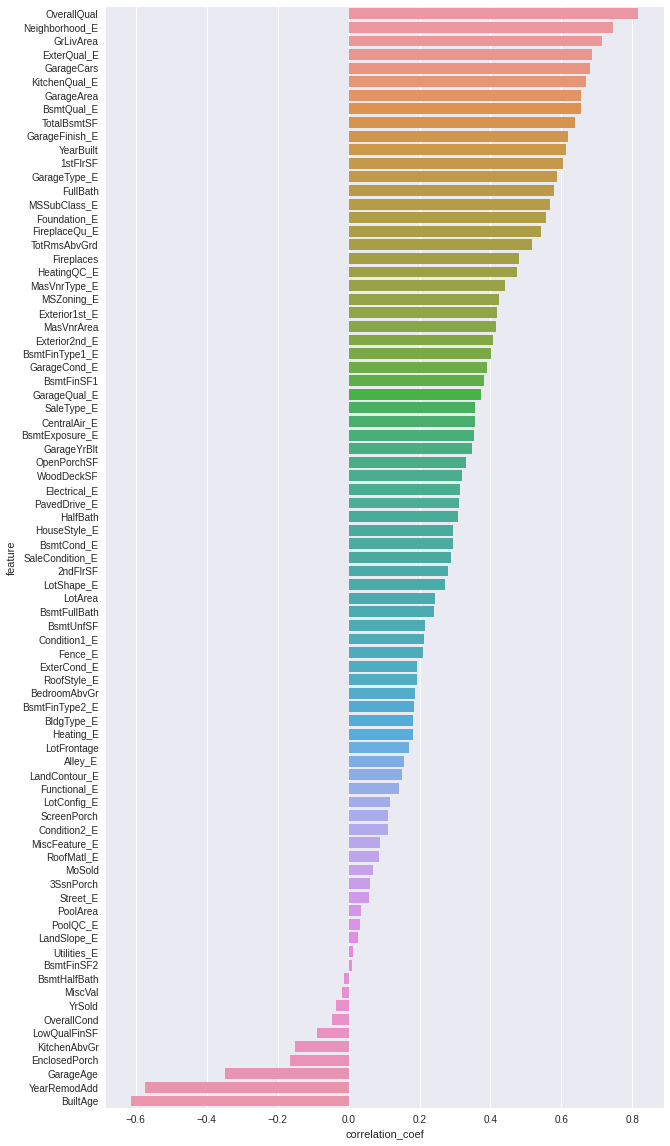

In [ ]:
cor = correlation(y, X)

Scatter plots

In [ ]:
features = cor['feature'][abs(cor['correlation_coef']) > 0.5]

In [ ]:
def scatter_plots(y, X, columns) :
    
    for f in columns :
      x = X[f]
  
      plt.title('Correlation ' + y.name + ' & ' + x.name)
      sns.regplot(x = x.name, y = y.name, data = pd.concat([x, y], axis = 1), x_jitter = .05)
      plt.show()

In [ ]:
features.head(200)

2        OverallQual
46    Neighborhood_E
14         GrLivArea
56       ExterQual_E
24        GarageCars
68     KitchenQual_E
25        GarageArea
59        BsmtQual_E
10       TotalBsmtSF
72    GarageFinish_E
4          YearBuilt
11          1stFlrSF
71      GarageType_E
17          FullBath
37      MSSubClass_E
58      Foundation_E
70     FireplaceQu_E
21      TotRmsAbvGrd
5       YearRemodAdd
35          BuiltAge
Name: feature, dtype: object

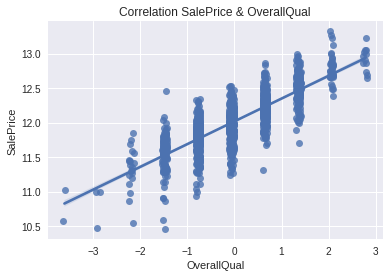

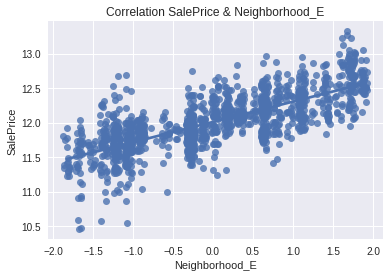

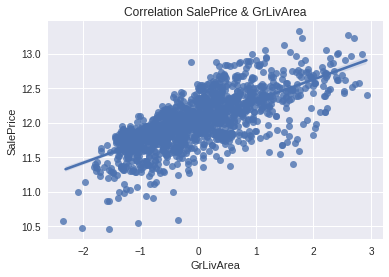

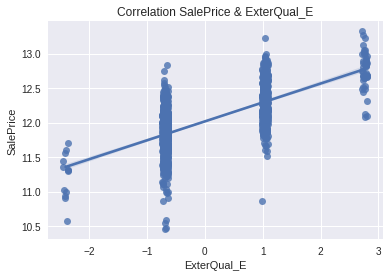

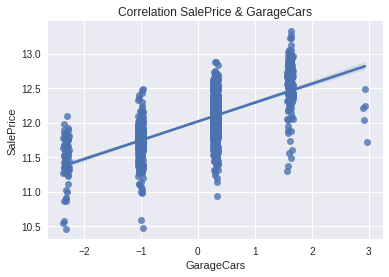

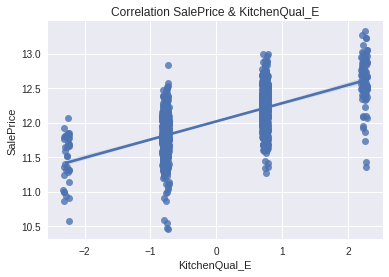

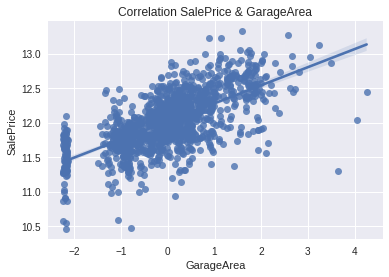

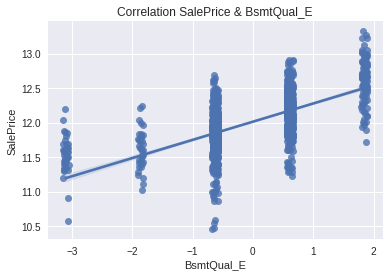

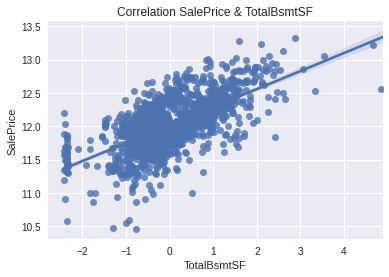

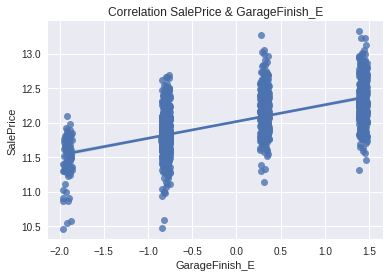

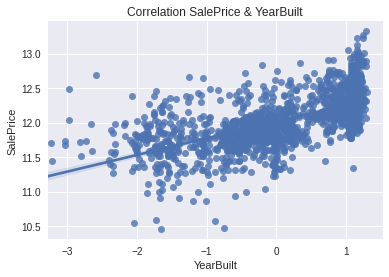

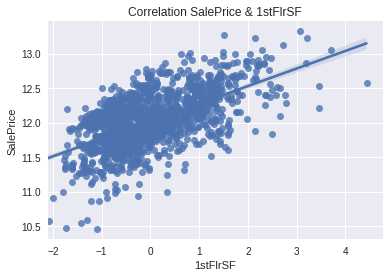

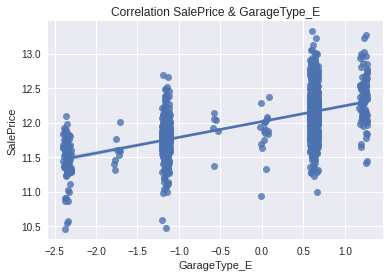

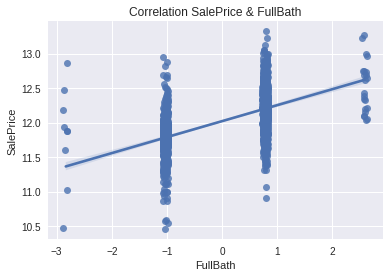

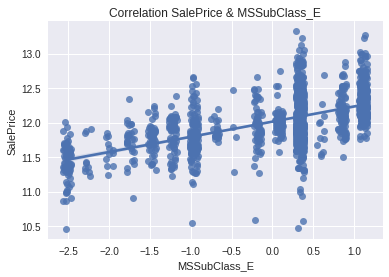

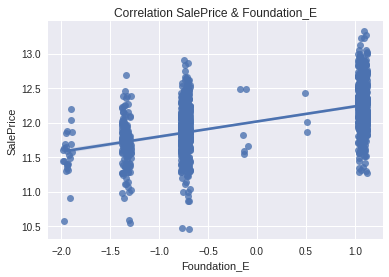

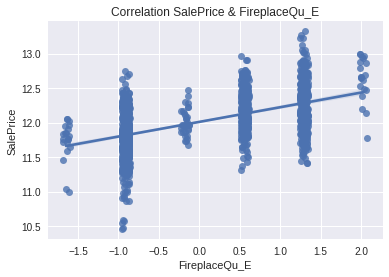

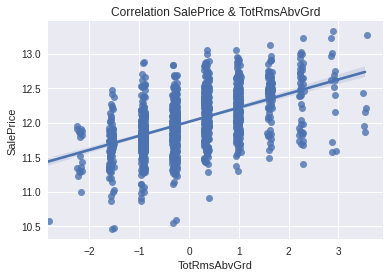

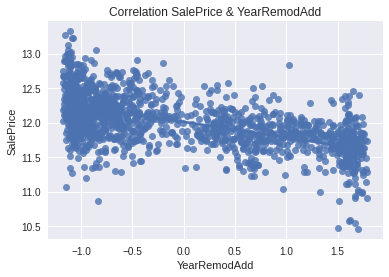

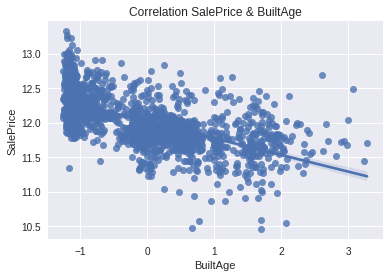

In [ ]:
scatter_plots(y, X, features)

# 4 Modélisation <a class="anchor" id="Modélisation"></a>
L'étape de prépocessing nous a permis d'identifier les variables suivantes comme ayant une corrélation significative avec le prix de vente :
- qualité générale "OverallQual",
- surface au sol " GrLivArea",
- surface du sous-sol "TotalBsmtSF",
- surface du premier niveau "1stFlrSF",
- année de construction "YearBuilt".
- quartier d'habitation "NeighborHood_E".

## 4.1 Modèle baseline


### Assomptions


In [ ]:
base = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'Neighborhood_E']

In [ ]:

# version minimum utiliser plutôt le rmse_cv
def rmse(actual, predicted) :
    return np.sqrt(mean_squared_error(actual, predicted))

In [ ]:

# A utiliser dans chaque modèle 
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)) #cross_val_score fonction
    return(rmse.mean())

In [ ]:
def r2_cv(model, X, y):
    r2 = cross_val_score(model, X, y, scoring="r2", cv=5) #cross_val_score fonction
    return(r2.mean())

In [ ]:
def scatter_plots_comparaison(y_train_pred, y_train, y_test_pred, y_test) :
  # Plot residuals
  plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
  plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Test data")
  plt.title("Linear regression")
  plt.xlabel("Predicted values")
  plt.ylabel("Residuals")
  plt.legend(loc = "upper left")
  plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
  plt.show()

  # Plot predictions
  plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
  plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Test data")
  plt.title("Linear regression")
  plt.xlabel("Predicted values")
  plt.ylabel("Real values")
  plt.legend(loc = "upper left")
  plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
  plt.show()

In [ ]:

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')


def diagnostic_plots(X, y, model_fit=None):
    """
    Function to reproduce the 4 base plots of an OLS model in R.

    ---
    Inputs:

    X: A numpy array or pandas dataframe of the features to use in building the linear regression model
    y: A numpy array or pandas series/dataframe of the target variable of the linear regression model

    model_fit [optional]: a statsmodel.api.OLS model after regressing y on X. If not provided, will be
                        generated from X, y
    """

    if not model_fit:
      model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # create dataframe from X, y for easier plot handling
    dataframe = pd.concat([X, y], axis=1)
    
    # model values
    model_fitted_y = model_fit.fittedvalues
    # model residuals
    model_residuals = model_fit.resid
    # normalized residuals
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    # absolute squared normalized residuals
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    # absolute residuals
    model_abs_resid = np.abs(model_residuals)
    # leverage, from statsmodels internals
    model_leverage = model_fit.get_influence().hat_matrix_diag
    # cook's distance, from statsmodels internals
    model_cooks = model_fit.get_influence().cooks_distance[0]
    
    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                                      lowess=True,
                                      scatter_kws={'alpha': 0.5},
                                      line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    
    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');
    
    # annotations
    abs_resid = model_abs_resid.sort_values(ascending=False)
    abs_resid_top_3 = abs_resid[:3]
    for i in abs_resid_top_3.index:
        plot_lm_1.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_residuals[i]));
        
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    
    # annotations
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                       model_norm_residuals[i]));
    
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
    
    # annotations
    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                   xy=(model_fitted_y[i],
                                       model_norm_residuals_abs_sqrt[i]));
    
    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
                scatter=False,
                ci=False,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');
    
    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                   xy=(model_leverage[i],
                                       model_norm_residuals[i]));
        
    p = len(model_fit.params) # number of model parameters
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance') # 0.5 line
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50)) # 1 line
    plot_lm_4.legend(loc='upper right');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


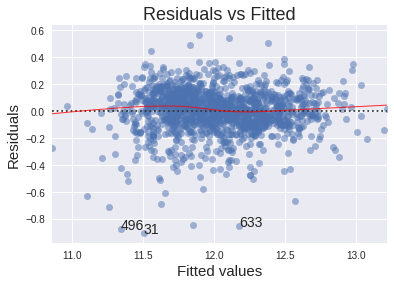

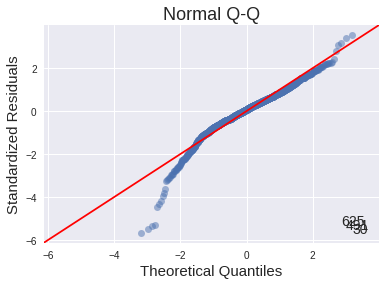

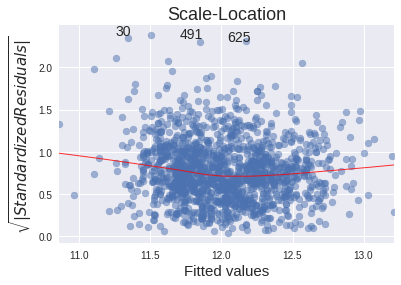

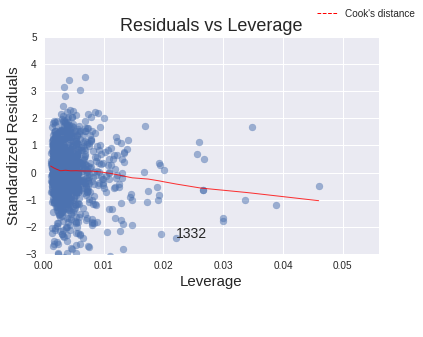

In [ ]:
diagnostic_plots(sm.add_constant(X[base]), y)

### 4.1.1 Régression Linéaire


In [ ]:
tic = time.perf_counter()

# Linear Regression
lr = LinearRegression()
lr.fit(X_train[base], y_train)

# Look at predictions on training and validation set
print("====================== Pred ====================== ")
print("")

print("R2 on Training set :", r2_cv(lr, X_train[base], y_train))
print("RMSE on Training set :", rmse_cv(lr, X_train[base], y_train))
print()
print("R2 on Test set :", r2_cv(lr, X_test[base], y_test))
print("RMSE on Test set :", rmse_cv(lr, X_test[base], y_test))

y_train_pred = lr.predict(X_train[base])
y_test_pred = lr.predict(X_test[base])

print("")
print("====================== Prix ====================== ")
print("")
print("Moyenne des résultats prédits sur le train : ", round(np.expm1(y_train_pred.mean()),1), " $")
print("Moyenne des résultats prédits sur le test : ", round(np.expm1(y_test_pred.mean()),1), " $")

toc = time.perf_counter()

print("")
print("====================== Perf ====================== ")
print("")
print(f"Performance du modèle en secondes : {toc - tic:0.4f} secondes")

====================== Pred ====================== 

R2 on Training set : 0.8470432004358935
RMSE on Training set : 0.15232899372464015

R2 on Test set : 0.8310149005743893
RMSE on Test set : 0.15571954815285144

====================== Prix ====================== 

Moyenne des résultats prédits sur le train :  165000.8  $
Moyenne des résultats prédits sur le test :  166347.3  $

====================== Perf ====================== 

Performance du modèle en secondes : 0.0774 secondes


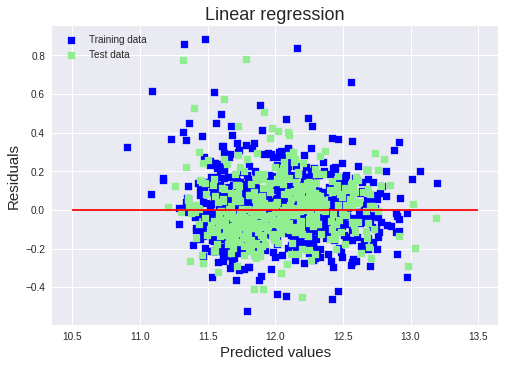

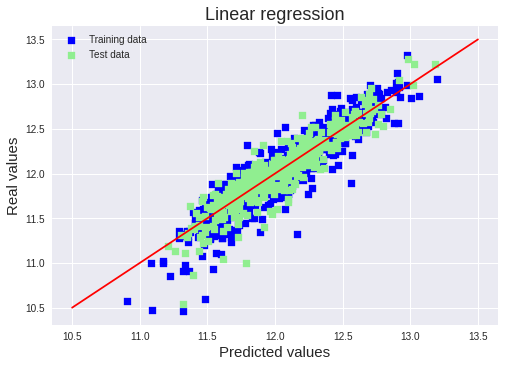

In [ ]:
scatter_plots_comparaison(y_train_pred,y_train,y_test_pred,y_test)

Nous notons un comportement similaire entre le training et le test. De fait, nous pouvons en déduire qu'il n'y a pas de surapprentissage (overfitting).

### 4.1.2 Soumission -  Kaggle (Score 0.16905)



In [ ]:
y_val = lr.predict(X_val[base])

print("")
print("Moyenne estimée des résultats à soumettre : ", round(np.expm1(y_val.mean()),1), " $")
print()

submission = pd.DataFrame()
submission['Id'] = X_val.index
submission['SalePrice'] = np.expm1(y_val)

submission.to_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/HousePrices/submission.csv', index = False)
print("Résultats inscrits dans submission.csv")


Moyenne estimée des résultats à soumettre :  164885.9  $

Résultats inscrits dans submission.csv


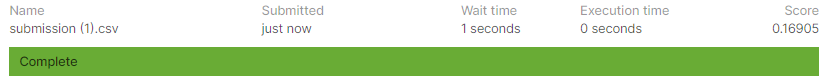

Au vue des bons résultats de ce modèle linéaire simple, nous prenons notes de l'aspect linéaire des données. Ce modèle à l'avantage d'être compréhensible par tout un chacun.

#4.2 Arbre de regression

In [ ]:
#https://www.kaggle.com/rohitayinaparthy/decision-trees-model-predicting-iowa-house-prices
# Define model
tic = time.perf_counter()
treeModel = DecisionTreeRegressor(max_depth=5)
treeModel.fit(X_train, y_train)
# balance complexité vs lisibilité

# Look at predictions on training and validation set
print("====================== Pred ====================== ")
print("")
print("R2 on Training set :", r2_cv(treeModel, X_train, y_train))
print("RMSE on Training set :", rmse_cv(treeModel, X_train, y_train))
print()
print("R2 on Test set :", r2_cv(treeModel, X_test, y_test))
print("RMSE on Test set :", rmse_cv(treeModel, X_test, y_test))

y_train_pred = treeModel.predict(X_train)
y_test_pred = treeModel.predict(X_test)

print("")
print("====================== Prix ====================== ")
print("")
print("Moyenne des résultats prédits sur le train : ", round(np.expm1(y_train_pred.mean()),1), " $")
print("Moyenne des résultats prédits sur le test : ", round(np.expm1(y_test_pred.mean()),1), " $")

print("")
print("====================== Perf ====================== ")
print("")
toc = time.perf_counter()
print(f"Performance du modèle en secondes : {toc - tic:0.4f} secondes")

# rajouter la carthographie de l'arbre pour voir les paramètres utilisés
#plt.figure(figsize=(20,20))
#_ = tree.plot_tree(treeModel, feature_names=X.columns, filled=True)

#pour dénormaliser en passant par l'exp1()
# https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.expm1.html#numpy.expm1

====================== Pred ====================== 

R2 on Training set : 0.7202644400123785
RMSE on Training set : 0.20286598790173888

R2 on Test set : 0.6489721970856225
RMSE on Test set : 0.21657970485330016

====================== Prix ====================== 

Moyenne des résultats prédits sur le train :  165000.8  $
Moyenne des résultats prédits sur le test :  165992.7  $

====================== Perf ====================== 

Performance du modèle en secondes : 0.1915 secondes


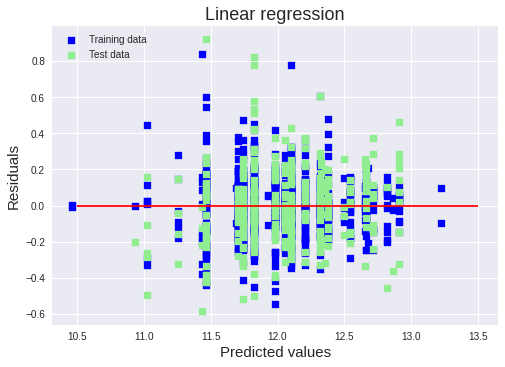

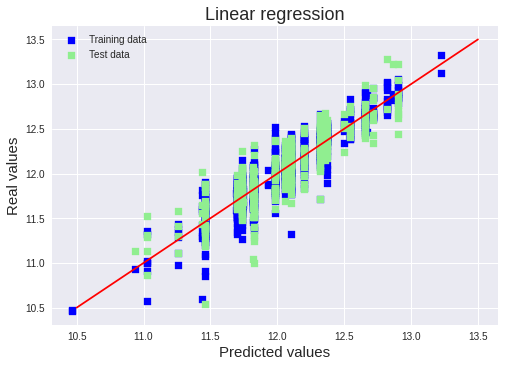

In [ ]:
scatter_plots_comparaison(y_train_pred,y_train,y_test_pred,y_test)

Nous notons un comportement similaire entre le training et le test. De fait, nous pouvons en déduire qu'il n'y a pas de surapprentissage (overfitting).

In [ ]:
print("Making predictions for the following 5 houses")
print(X.head())

print("The predicted values are")
y_val = treeModel.predict(X.head())
np.expm1(y_val)

Making predictions for the following 5 houses
    LotFrontage   LotArea  ...  SaleType_E  SaleCondition_E
Id                         ...                             
1      0.216075 -0.217879  ...   -0.228569         0.189839
2      0.664158 -0.072044  ...   -0.228569         0.189839
3      0.305692  0.137197  ...   -0.228569         0.189839
4      0.066714 -0.078385  ...   -0.228569        -3.209785
5      0.783647  0.518903  ...   -0.228569         0.189839

[5 rows x 81 columns]
The predicted values are


array([180108.19961146, 172123.39001002, 180108.19961146, 180108.19961146,
       314395.97918132])

### 4.2.1 Soumission -  Kaggle (Score 0.20673)

In [ ]:
y_val = treeModel.predict(X_val)

print("")
print("Moyenne estimée des résultats à soumettre : ", round(np.expm1(y_val.mean()),1), " $")
print()

submission = pd.DataFrame()
submission['Id'] = X_val.index
submission['SalePrice'] = np.expm1(y_val)

submission.to_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/HousePrices/submission.csv', index = False)
print("Résultats inscrits dans submission.csv")


Moyenne estimée des résultats à soumettre :  164907.4  $

Résultats inscrits dans submission.csv


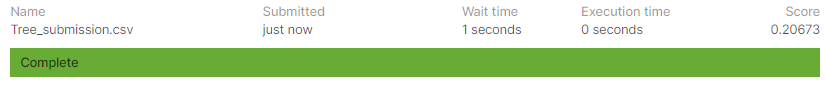

Un arbre à 7 niveaux semble plus efficace qu'à 5 niveaux. Cependant, même à 5 niveaux et avec une représentation graphique, l'arbre perd son avantage principal qui reste sa lisibilité et sa retranscription du métier pour un individu Lambda.

Par ailleurs les rmse et r2 très médiocres de ce modèle arbre, nous donne l'information que le problème semble être de nature linéaire, et non, non-linéaire. 

#4.3 SVM


In [ ]:
tic = time.perf_counter()
# Create a SVM Regressor
reg = svm.SVR()
reg.fit(X_train, y_train)
# balance complexité vs lisibilité

# Look at predictions on training and validation set
print("====================== Pred ====================== ")
print("")

print("R2 on Training set :", r2_cv(reg, X_train, y_train))
print("RMSE on Training set :", rmse_cv(reg, X_train, y_train))
print()
print("R2 on Test set :", r2_cv(reg, X_test, y_test))
print("RMSE on Test set :", rmse_cv(reg, X_test, y_test))

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("")
print("====================== Prix ====================== ")
print("")
print("Moyenne des résultats prédits sur le train : ", round(np.expm1(y_train_pred.mean()),1), " $")
print("Moyenne des résultats prédits sur le test : ", round(np.expm1(y_test_pred.mean()),1), " $")

print("")
print("====================== Perf ====================== ")
print("")
toc = time.perf_counter()
print(f"Performance du modèle en secondes : {toc - tic:0.4f} secondes")

====================== Pred ====================== 

R2 on Training set : 0.8228639252191744
RMSE on Training set : 0.16366934130931532

R2 on Test set : 0.761488709953358
RMSE on Test set : 0.18338996316721495

====================== Prix ====================== 

Moyenne des résultats prédits sur le train :  163911.1  $
Moyenne des résultats prédits sur le test :  165691.0  $

====================== Perf ====================== 

Performance du modèle en secondes : 1.0121 secondes


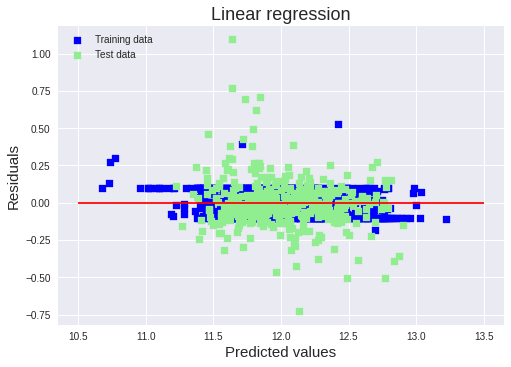

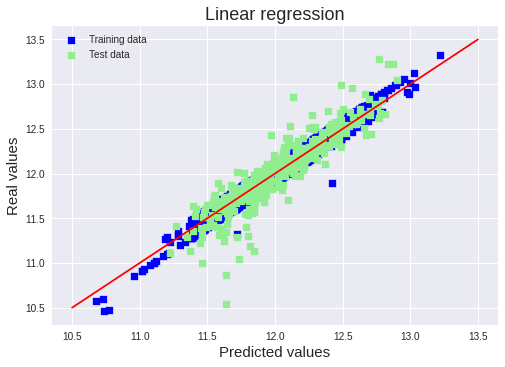

In [ ]:
scatter_plots_comparaison(y_train_pred,y_train,y_test_pred,y_test)

Nous notons un comportement similaire entre le training et le test. De fait, nous pouvons en déduire qu'il n'y a pas de surapprentissage (overfitting).

In [ ]:
print("Making predictions for the following 5 houses")
print(X.head())
y_val = reg.predict(X.head())

print("The predicted values are")
np.expm1(y_val)

Making predictions for the following 5 houses
    LotFrontage   LotArea  ...  SaleType_E  SaleCondition_E
Id                         ...                             
1      0.216075 -0.217879  ...   -0.228569         0.189839
2      0.664158 -0.072044  ...   -0.228569         0.189839
3      0.305692  0.137197  ...   -0.228569         0.189839
4      0.066714 -0.078385  ...   -0.228569        -3.209785
5      0.783647  0.518903  ...   -0.228569         0.189839

[5 rows x 81 columns]
The predicted values are


array([202875.52592263, 179909.27874751, 216814.89221112, 154733.83758683,
       318223.80317511])

### 4.3.1 Soumission -  Kaggle (Score 0.17677)


In [ ]:
y_val = reg.predict(X_val)

print("")
print("Moyenne estimée des résultats à soumettre : ", round(np.expm1(y_val.mean()),1), " $")
print()

submission = pd.DataFrame()
submission['Id'] = X_val.index
submission['SalePrice'] = np.expm1(y_val)

submission.to_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/HousePrices/submission.csv', index = False)
print("Résultats inscrits dans submission.csv")




Moyenne estimée des résultats à soumettre :  162518.6  $

Résultats inscrits dans submission.csv


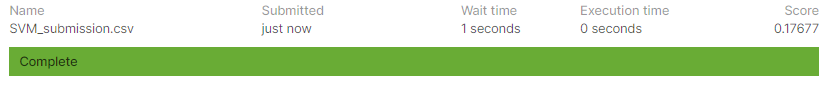

Le modèle SVM semble peu adapté à cette problématique. Et ce, à la fois de part ses mauvais rmse et r2, mais également de part son aspect boite noire. En effet ce modèle reste particulièrement difficile à appréhender.

#4.4 Lasso




https://www.kaggle.com/sabahkarim/house-price-prediction-lasso-regression-0-1265?scriptVersionId=3006665&cellId=56


In [ ]:
tic = time.perf_counter()
# Create a SVM Regressor
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], selection='random', max_iter=15000)

model_lasso.fit(X_train, y_train)
# balance complexité vs lisibilité

# Look at predictions on training and validation set
print("====================== Pred ====================== ")
print("")
print("R2 on Training set :", r2_cv(model_lasso, X_train, y_train))
print("RMSE on Training set :", rmse_cv(model_lasso, X_train, y_train))
print()
print("R2 on Test set :", r2_cv(model_lasso, X_test, y_test))
print("RMSE on Test set :", rmse_cv(model_lasso, X_test, y_test))

y_train_pred = model_lasso.predict(X_train)
y_test_pred = model_lasso.predict(X_test)

print("")
print("====================== Prix ====================== ")
print("")

print("Moyenne des résultats prédits sur le train : ", round(np.expm1(y_train_pred.mean()),1), " $")
print("Moyenne des résultats prédits sur le test : ", round(np.expm1(y_test_pred.mean()),1), " $")
print("")
print("====================== Perf ====================== ")
print("")

toc = time.perf_counter()
print(f"Performance du modèle en secondes : {toc - tic:0.4f} secondes")

====================== Pred ====================== 

R2 on Training set : 0.9108965995676421
RMSE on Training set : 0.11632758963644903

R2 on Test set : 0.8925624262158278
RMSE on Test set : 0.12406198441605443

====================== Prix ====================== 

Moyenne des résultats prédits sur le train :  165000.8  $
Moyenne des résultats prédits sur le test :  166315.3  $

====================== Perf ====================== 

Performance du modèle en secondes : 1.5519 secondes


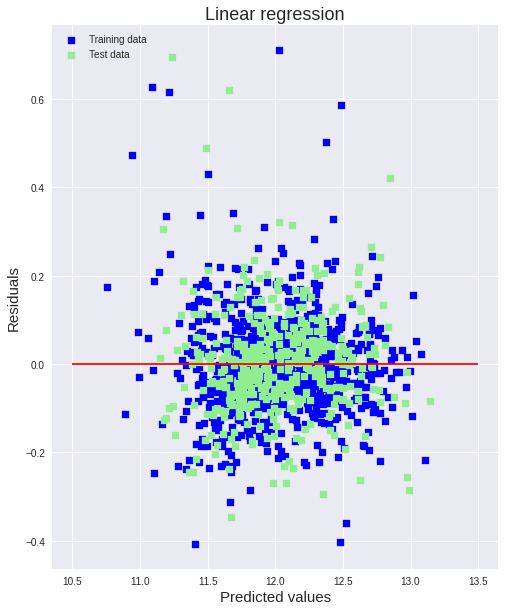

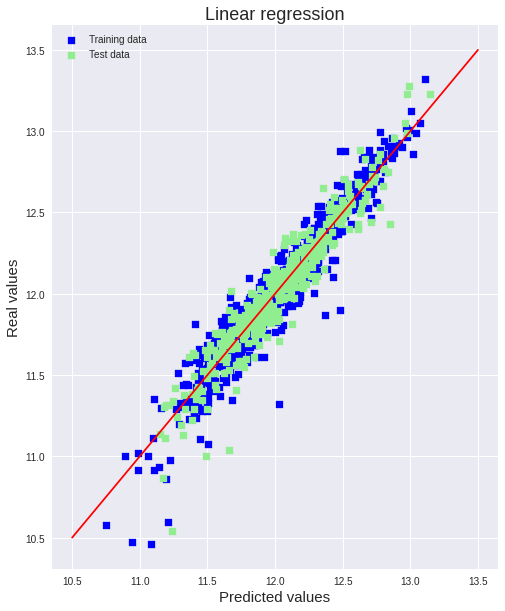

In [ ]:
scatter_plots_comparaison(y_train_pred,y_train,y_test_pred,y_test)

Nous notons un comportement similaire entre le training et le test. De fait, nous pouvons en déduire qu'il n'y a pas de surapprentissage (overfitting).

In [ ]:
print("Making predictions for the following 5 houses")
print(X.head())
y_val = model_lasso.predict(X.head())

print("The predicted values are")
np.expm1(y_val)

Making predictions for the following 5 houses
    LotFrontage   LotArea  ...  SaleType_E  SaleCondition_E
Id                         ...                             
1      0.216075 -0.217879  ...   -0.228569         0.189839
2      0.664158 -0.072044  ...   -0.228569         0.189839
3      0.305692  0.137197  ...   -0.228569         0.189839
4      0.066714 -0.078385  ...   -0.228569        -3.209785
5      0.783647  0.518903  ...   -0.228569         0.189839

[5 rows x 81 columns]
The predicted values are


array([205584.71471346, 192885.17048341, 217584.94915994, 166444.54851927,
       299852.53759357])

In [ ]:
coef = pd.Series(model_lasso.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 64 variables and eliminated the other 17 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

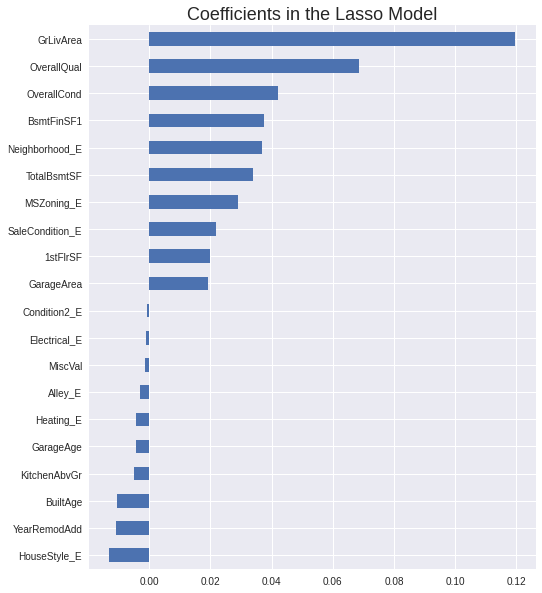

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

Visualisation directe de l'importance des variables GrLivArea, OverallQual, OverallQual, Neighborhood_E,....

### 4.4.1 Soumission -  Kaggle (Score 0.13447)

In [ ]:
y_val = model_lasso.predict(X_val)

print("")
print("Moyenne estimée des résultats à soumettre : ", round(np.expm1(y_val.mean()),1), " $")
print()

submission = pd.DataFrame()
submission['Id'] = X_val.index
submission['SalePrice'] = np.expm1(y_val)

submission.to_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/HousePrices/submission.csv', index = False)
print("Résultats inscrits dans submission.csv")


Moyenne estimée des résultats à soumettre :  164591.1  $

Résultats inscrits dans submission.csv


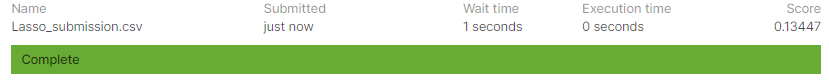

Ce modèle offre 3 avantages majeurs :
  1. ses bons résultats rmse et r2,
  2. sa lisibilité, son fonctionnement est compréhensible par tout un chacun grâce à la visualisation des variables clées pour le calcul de la prédiction.
  3. son temps d'excution est tout à afit raisonnable



#4.5 Gradient Boosting Regression

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard


In [ ]:
tic = time.perf_counter()

GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=5, 
                                   loss='huber', random_state =5)

GBoost.fit(X_train, y_train)
# balance complexité vs lisibilité

# Look at predictions on training and validation set
print("====================== Pred ====================== ")
print("")

print("R2 on Training set :", r2_cv(GBoost, X_train, y_train))
print("RMSE on Training set :", rmse_cv(GBoost, X_train, y_train))
print()
print("R2 on Test set :", r2_cv(GBoost, X_test, y_test))
print("RMSE on Test set :", rmse_cv(GBoost, X_test, y_test))

y_train_pred = GBoost.predict(X_train)
y_test_pred = GBoost.predict(X_test)

print("")
print("====================== Prix ====================== ")
print("")

print("Moyenne des résultats prédits sur le train : ", round(np.expm1(y_train_pred.mean()),1), " $")
print("Moyenne des résultats prédits sur le test : ", round(np.expm1(y_test_pred.mean()),1), " $")

print("")
print("====================== Perf ====================== ")
print()
toc = time.perf_counter()
print(f"Performance du modèle en secondes : {toc - tic:0.4f} secondes")

====================== Pred ====================== 

R2 on Training set : 0.9096466080163849
RMSE on Training set : 0.11708817828699017

R2 on Test set : 0.8779244877248127
RMSE on Test set : 0.13210544841872562

====================== Prix ====================== 

Moyenne des résultats prédits sur le train :  165676.4  $
Moyenne des résultats prédits sur le test :  166516.2  $

====================== Perf ====================== 

Performance du modèle en secondes : 51.3334 secondes


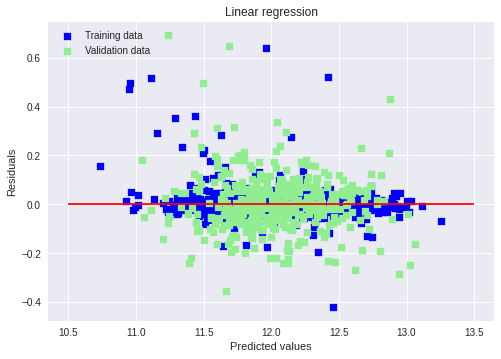

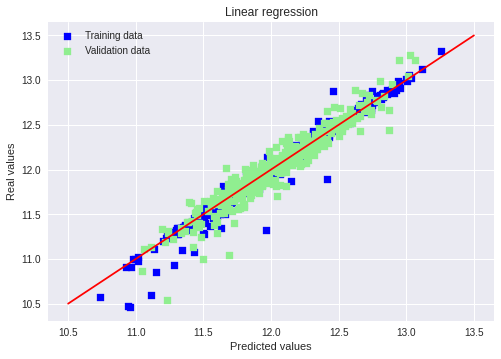

In [ ]:
scatter_plots_comparaison(y_train_pred,y_train,y_test_pred,y_test)

Nous notons un comportement similaire entre le training et le test. De fait, nous pouvons en déduire qu'il n'y a pas de surapprentissage (overfitting).

In [ ]:
print("Making predictions for the following 5 houses")
print(X.head())
y_val=GBoost.predict(X.head())

print("The predicted values are")
np.expm1(y_val)

Making predictions for the following 5 houses
    LotFrontage   LotArea  ...  SaleType_E  SaleCondition_E
Id                         ...                             
1      0.216075 -0.217879  ...   -0.228569         0.189839
2      0.664158 -0.072044  ...   -0.228569         0.189839
3      0.305692  0.137197  ...   -0.228569         0.189839
4      0.066714 -0.078385  ...   -0.228569        -3.209785
5      0.783647  0.518903  ...   -0.228569         0.189839

[5 rows x 81 columns]
The predicted values are


array([205084.97137433, 190615.26513397, 215125.24414564, 145507.72484205,
       314777.42931583])

Evaluation de la performance

-> faire un scatterplot réel prédiction

-> axe statistique / Informatique / Business

### 4.5.1 Soumission -  Kaggle (Score 0.12647)

In [ ]:
y_val = GBoost.predict(X_val)

print("")
print("Moyenne estimée des résultats à soumettre : ", round(np.expm1(y_val.mean()),1), " $")
print()

submission = pd.DataFrame()
submission['Id'] = X_val.index
submission['SalePrice'] = np.expm1(y_val)

submission.to_csv('/content/drive/MyDrive/ColabNotebooks/DataScience/HousePrices/submission.csv', index = False)
print("Résultats inscrits dans submission.csv")




Moyenne estimée des résultats à soumettre :  164494.5  $

Résultats inscrits dans submission.csv


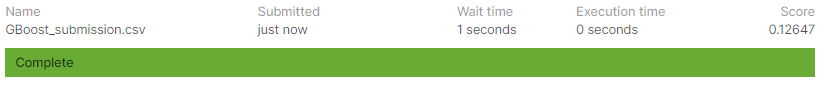

Ce modèle offre d'excellent résultat du point de vue de sa prédiction (très bon r2 et rmse).
Cela dit, il implique un temps d'exécution très long par rapport aux autres modèles. Et son fonctionnement interne reste peu intelligible (effet black boxe). 
Aussi sur un grand set de données et suivant à quelle équipe s'adresse le modèle, nous ne le recommanderions pas forcéement comme première alternative.

# 5 Evaluation générale<a class="anchor" id="Evaluation"></a>  
Avant de procéder au déploiement final du modèle construit par l'analyste de données, il est important d'évaluer plus en profondeur le modèle et d'examiner sa construction pour s'assurer qu'il atteint correctement les objectifs commerciaux. Il est ici essentiel de déterminer si une question commerciale importante n'a pas été suffisamment prise en compte. À la fin de cette phase, le chef de projet doit alors décider exactement comment utiliser les résultats de l'exploration des données. Les étapes clés sont ici l'évaluation des résultats, l'examen du processus et la détermination des étapes suivantes.

 
 Comparaison :       rmse rmsecv r2 r2cv temps execution  
- Modèle baseline   0.16
- Arbre                    
- SVM
- Lasso
- GBoost